# ProtPeptigram

![Python Package](https://github.com/Sanpme66/ProtPeptigram/actions/workflows/python-package.yml/badge.svg)
[![PyPI version](https://badge.fury.io/py/protpeptigram.svg)](https://badge.fury.io/py/protpeptigram)
[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT)

## Visualization of Immunopeptides Mapped to Source Proteins Across Multiple Samples

ProtPeptigram provides a comprehensive visualization platform for mapping immunopeptides to their source proteins across different biological samples. This tool enables researchers to identify peptide coverage patterns, analyze density distributions, and compare peptide presentations between experimental conditions.


In [1]:
!pip install protpeptigram


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [20]:
!mkdir data
%cd data
!curl -L -O https://github.com/Sanpme66/ProtPeptigram/raw/main/data/JCI146771_Mouse_peptides_peaks_online.csv
!curl -L -O https://github.com/Sanpme66/ProtPeptigram/raw/main/data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta
%cd ..

/Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/example/data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1494k  100 1494k    0     0  1294k      0  0:00:01  0:00:01 --:--:-- 42.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11.1M  100 11.1M    0     0  7704k      0  0:00:01  0:00:01 --:--:-- 27.7M
/Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/example


[10:25:00] Loaded 17951 peptide entries from ./data/JCI146771_Mouse_peptides_peaks_online.csv   ]8;id=105735;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=391605;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#78\78]8;;\

           Found 6 intensity columns: Intensity_Hep_B10BR_28-14-8s, Intensity_Hep_B10BR_K9-178, ]8;id=525496;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=832498;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#93\93]8;;\
           Intensity_178-3 skin graft_28-14-8s, Intensity_178-3 skin graft_K9-178,                                 
           Intensity_178-3 spleen_K9-178, Intensity_178-3 spleen_Y-3                                               

           Loaded 34444 protein sequences from                                                 ]8;id=404949;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=876827;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#125\125]8;;\
           ./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta                                         

           Removed 692 contaminant entries                                                     ]8;id=987635;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=868704;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#269\269]8;;\

[10:25:16] Created formatted data with 9830 peptide-protein-sample combinations                ]8;id=237293;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=635642;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#333\333]8;;\

           PTMs were removed for position finding. Original peptides preserved in 'Peptide'    ]8;id=630763;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=663322;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#334\334]8;;\
           column, clean versions in 'CleanPeptide' column.                                                        

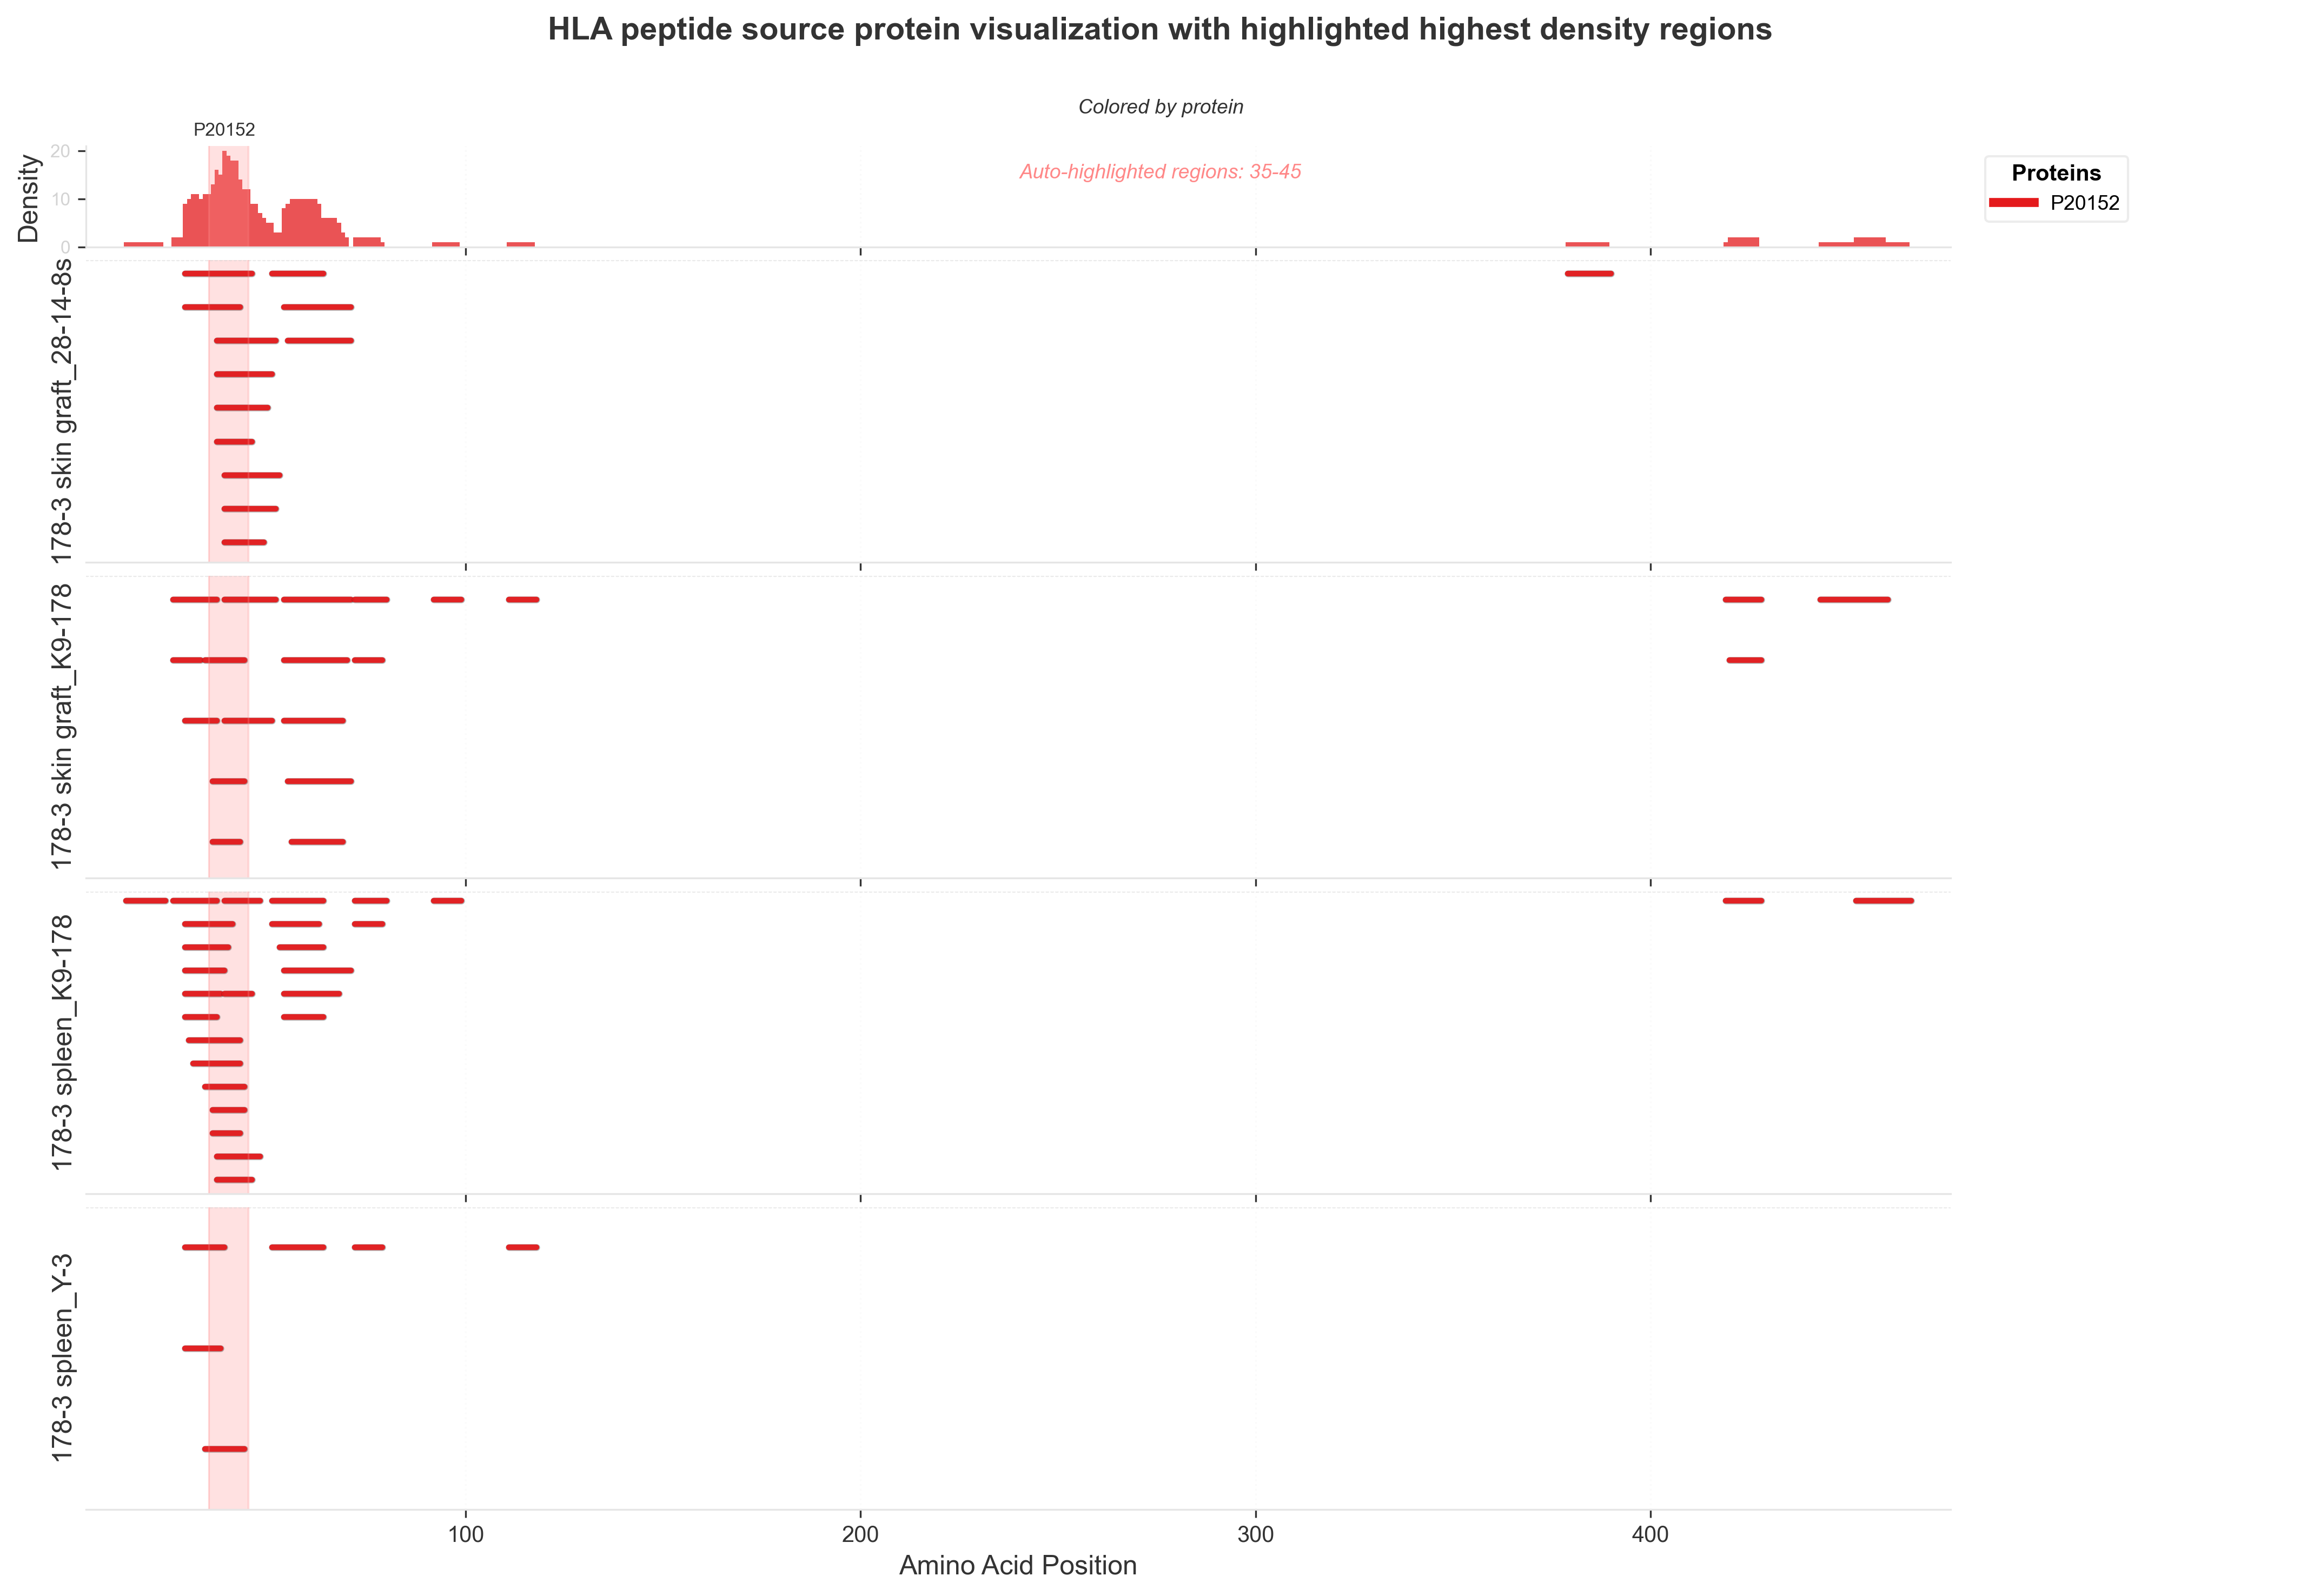

In [2]:
from ProtPeptigram.DataProcessor import PeptideDataProcessor
from ProtPeptigram.viz import ImmunoViz

# Initialize data processor
processor = PeptideDataProcessor()

# Load data
processor.load_peaks_data("./data/JCI146771_Mouse_peptides_peaks_online.csv")
processor.load_protein_sequences("./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta")

# Process data
formatted_data = processor.filter_and_format_data(
    filter_contaminants=True,
    intensity_threshold=0,
    min_samples=1
)

# Create visualizations
viz = ImmunoViz(formatted_data)
fig, _ = viz.plot_peptigram(
    protein_ids=["P20152"],
    group_by="Sample",
    color_by="protein",
     protein_cmap="Set1",
    title="HLA peptide source protein visualization with highlighted highest density regions",
)

# Save visualization
fig.savefig("protein_visualization.png", dpi=300, bbox_inches="tight")

## Without highlight

[10:25:40] Loaded 17951 peptide entries from ./data/JCI146771_Mouse_peptides_peaks_online.csv   ]8;id=222922;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=857740;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#78\78]8;;\

           Found 6 intensity columns: Intensity_Hep_B10BR_28-14-8s, Intensity_Hep_B10BR_K9-178, ]8;id=743071;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=588608;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#93\93]8;;\
           Intensity_178-3 skin graft_28-14-8s, Intensity_178-3 skin graft_K9-178,                                 
           Intensity_178-3 spleen_K9-178, Intensity_178-3 spleen_Y-3                                               

           Loaded 34444 protein sequences from                                                 ]8;id=908985;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=232227;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#125\125]8;;\
           ./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta                                         

           Removed 692 contaminant entries                                                     ]8;id=977917;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=217949;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#269\269]8;;\

           Removed 0 entries below intensity threshold of 0 or minimum sample count of 2       ]8;id=12128;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=869013;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#279\279]8;;\

[10:25:56] Created formatted data with 9830 peptide-protein-sample combinations                ]8;id=544933;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=523376;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#333\333]8;;\

           PTMs were removed for position finding. Original peptides preserved in 'Peptide'    ]8;id=373732;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=605140;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#334\334]8;;\
           column, clean versions in 'CleanPeptide' column.                                                        

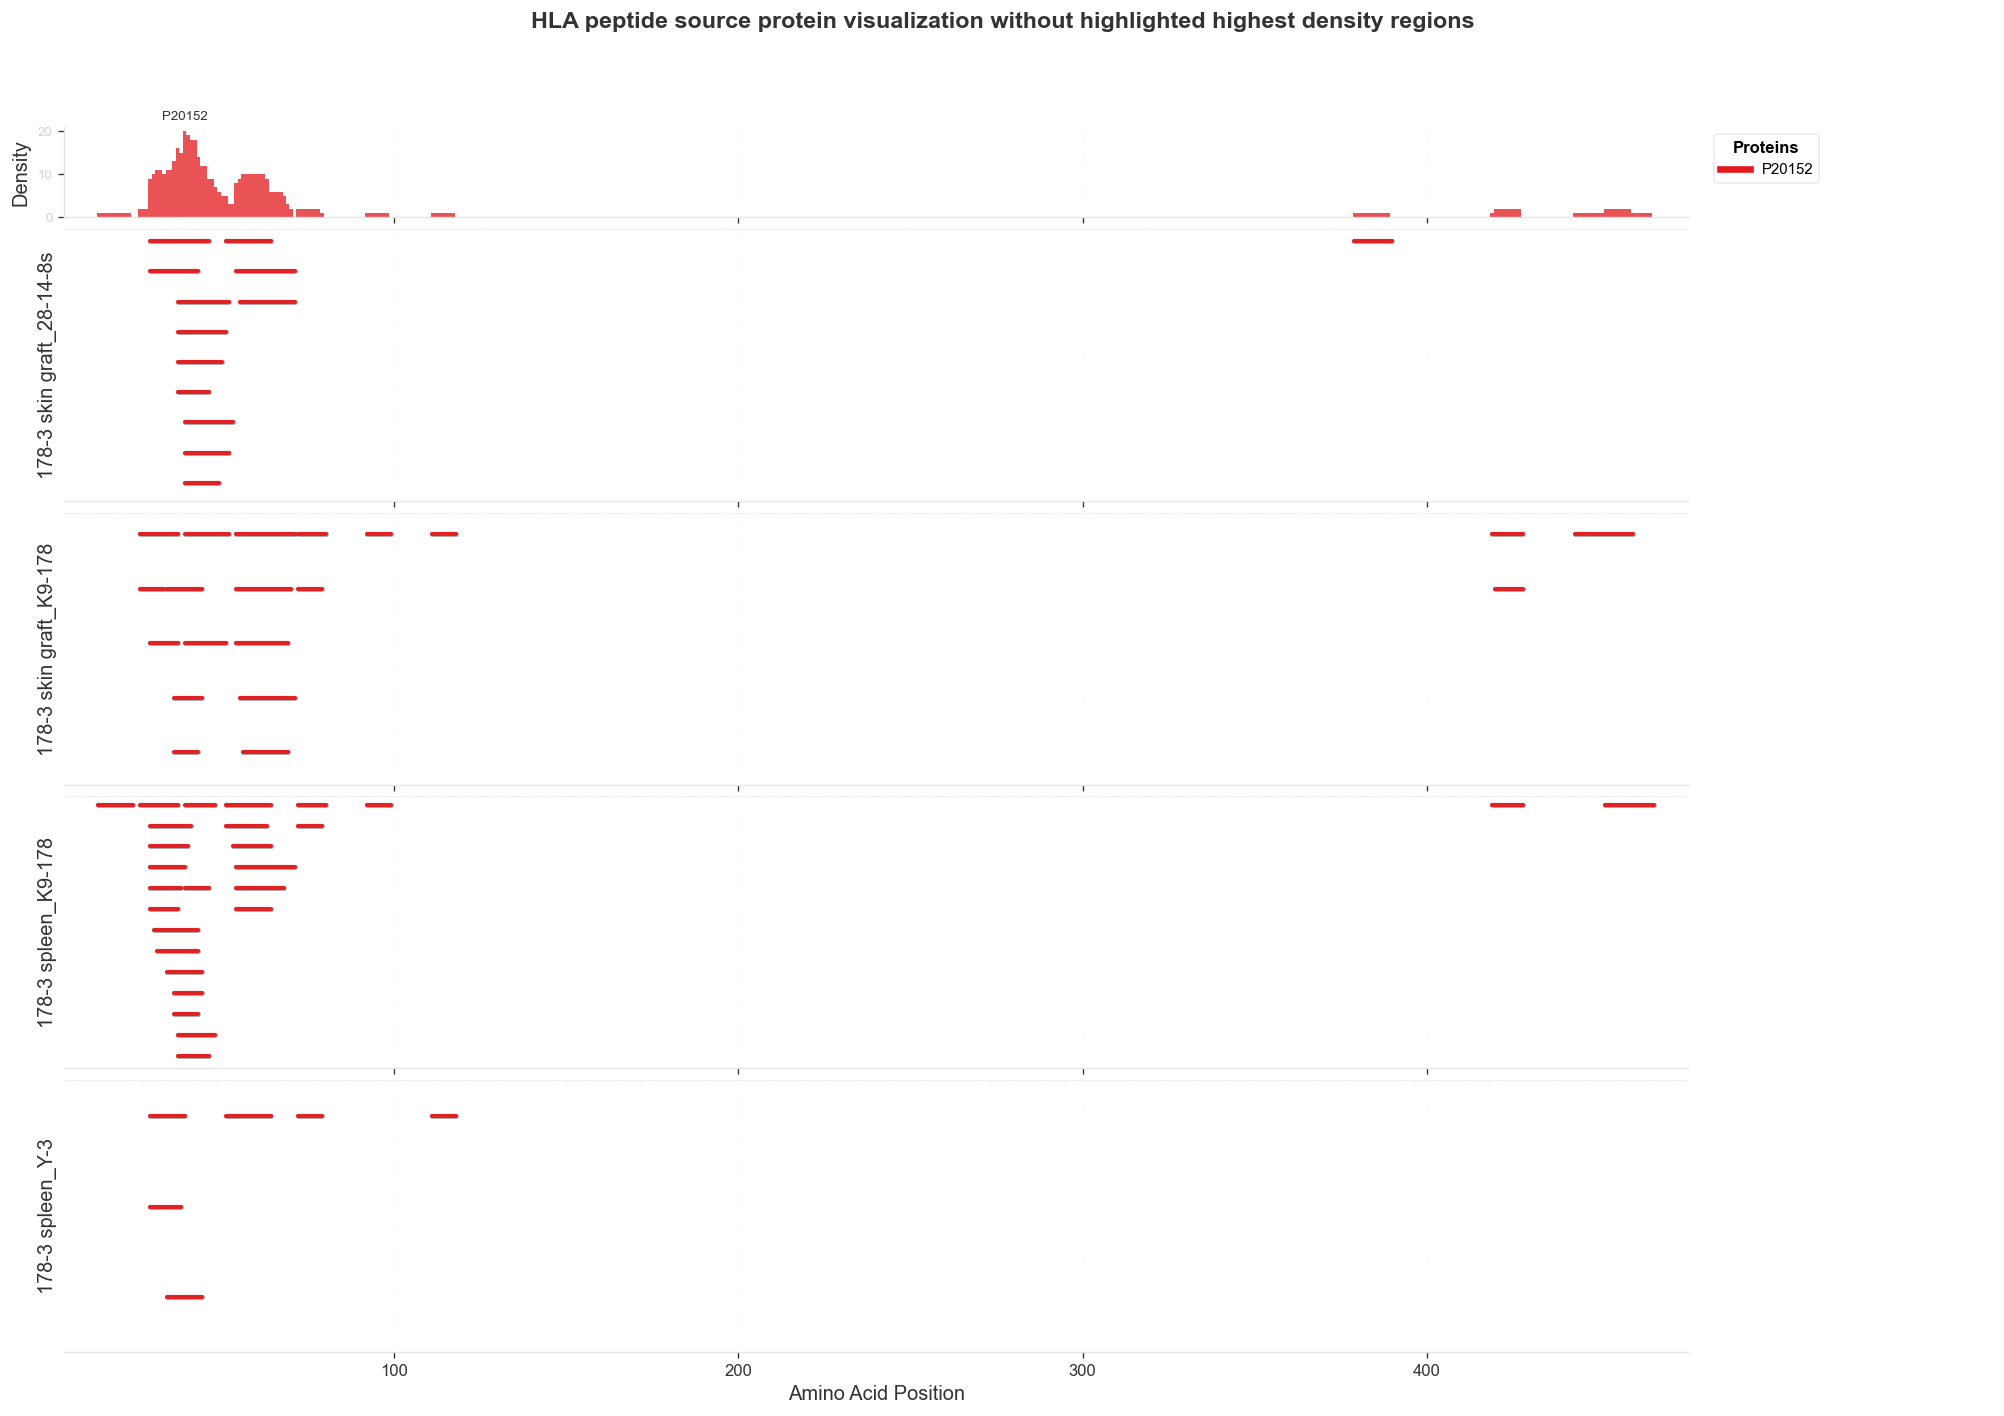

In [3]:
from ProtPeptigram.DataProcessor import PeptideDataProcessor
from ProtPeptigram.viz import ImmunoViz

# Initialize data processor
processor = PeptideDataProcessor()

# Load data
processor.load_peaks_data("./data/JCI146771_Mouse_peptides_peaks_online.csv")
processor.load_protein_sequences("./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta")

# Process data
formatted_data = processor.filter_and_format_data(
    filter_contaminants=True,
    intensity_threshold=0,
    min_samples=2
)

# Create visualizations
viz = ImmunoViz(formatted_data)
# fig, _ = viz.plot_peptigram(
#     protein_ids=["P20152"],
#     group_by="Sample",
#     color_by="protein",
#     title="HLA Peptide Visualization"
# )


fig, _ = viz.plot_peptigram(
    ['P20152'],#'P32261'], #['P20152','P32261','Q9QX47'],
    group_by='Sample',
    color_by='test',
    figsize=(14, 12),
    title="HLA peptide source protein visualization without highlighted highest density regions",
    color_by_protein_and_intensity=False,
    # Assign specific colormaps to each protein
    # intensity_cmaps=["Blues", "Reds", "Greens", "Purples"],
    protein_cmap="Set1",
    external_legend=True,
    highlight=False,
    auto_highlight=False,
    highlight_alpha=100,
    auto_highlight_threshold=0.8,
    auto_highlight_window=10,
    dpi=120
)


# # Save visualization
# fig.savefig("protein_visualization_without_h.png", dpi=300, bbox_inches="tight")

